In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import *
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import numpy as np

Using Theano backend.


In [26]:
nb_examples = 10000

def gen(nb_examples):
    x1 = np.random.uniform(-3, 3, size=(nb_examples, 1))
    x2 = np.random.uniform(-1, 1, size=(nb_examples, 1))
    f_x1 = np.sin(x1)
    f_x2 = np.log(x2**2)
    X = np.concatenate((x1, x2), axis=1)
    F = np.concatenate((f_x1, f_x2), axis=1)
    y = f_x1 + f_x2
    return X, F, y

X, F, y = gen(nb_examples)

nb_train = 8000
X_train, F_train, y_train = X[0:nb_train], F[0:nb_train], y[0:nb_train]
X_test, F_test, y_test = X[nb_train:], F[nb_train:], y[nb_train:]

In [27]:
nb_features = X.shape[1]
nb_outputs = y.shape[1]
nb_layers = 2
nb_hidden = 100

outs = []
x = Input(shape=(nb_features,), name='input')
for i in range(nb_features):
    x_feat = Lambda(lambda m: m[:, i:i + 1], output_shape=(1,))(x) 
    h = x_feat
    for j in range(nb_layers):
        h = Dense(nb_hidden, activation='relu')(h)
    out_feat = Dense(nb_outputs)(h)
    outs.append(out_feat)
out = merge(outs, mode='sum')
model = Model(x, out)
shape_func = []
for o in outs:
    shape_func.append(Model(x, o))
optimizer = SGD(nesterov=True , lr=0.001, momentum=0.99)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

In [28]:
model.fit(X_train, y_train, batch_size=100, nb_epoch=50, verbose=2)

Epoch 1/50
0s - loss: 4.5435 - mean_squared_error: 4.5435
Epoch 2/50
0s - loss: 1.4110 - mean_squared_error: 1.4110
Epoch 3/50
0s - loss: 0.9617 - mean_squared_error: 0.9617
Epoch 4/50
0s - loss: 0.6794 - mean_squared_error: 0.6794
Epoch 5/50
0s - loss: 0.4359 - mean_squared_error: 0.4359
Epoch 6/50
0s - loss: 0.2654 - mean_squared_error: 0.2654
Epoch 7/50
0s - loss: 0.1787 - mean_squared_error: 0.1787
Epoch 8/50
0s - loss: 0.1293 - mean_squared_error: 0.1293
Epoch 9/50
0s - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 10/50
0s - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 11/50
0s - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 12/50
0s - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 13/50
0s - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 14/50
0s - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 15/50
0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 16/50
0s - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 17/50
0s - loss: 0.0495 - mean_squared_error: 0.0495
Epoch 

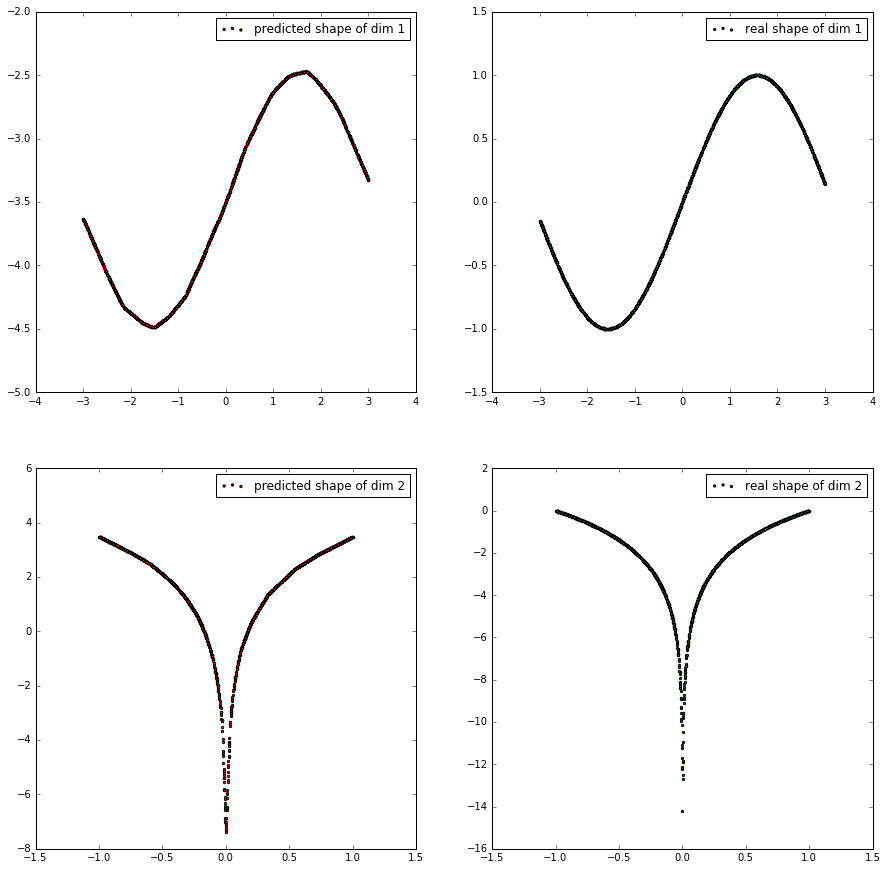

In [29]:
fig = plt.figure(figsize=(15, 15))
k = 1
for i in range(nb_features):
    plt.subplot(nb_features, nb_features, k)

    plt.scatter(X_test[:, i], 
                shape_func[i].predict(X_test), 
                c='r', 
                label='predicted shape of dim {}'.format(i + 1), s=5)
    plt.legend(loc='best')

    k += 1
    plt.subplot(nb_features, nb_features, k)
    plt.scatter(X_test[:, i], 
                F_test[:, i], 
                c='g', 
                label='real shape of dim {}'.format(i + 1), s=5)
    plt.legend(loc='best')
    k += 1
plt.show()